<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [212]:
import re
import string
from collections import Counter
import squarify
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup
import pprint

nlp = spacy.load("en_core_web_lg")

In [213]:
def clean_listing(description):

    soup = BeautifulSoup(description)

    return soup.get_text()

def tokenize(document):

    doc = nlp(document)

    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_digit == False)]


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [214]:
import requests

In [215]:
df = pd.read_csv('./data/job_listings.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [216]:
df['cleaned_description'] = df['description'].apply(clean_listing)

In [217]:
df['cleaned_description'][0]


'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

## 2) Use Spacy to tokenize the listings 

In [218]:
df['tokens'] = df['cleaned_description'].apply(tokenize)

In [219]:
## df['tokens'][1]

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [220]:
count_vectorize = CountVectorizer(stop_words='english', max_features=1000, max_df=.97, min_df=.05, tokenizer=tokenize,
                                  ngram_range=(1, 4))

dtm = count_vectorize.fit_transform(df['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=count_vectorize.get_feature_names())

In [221]:
dtm.head()

,$,+,+ year,+ year experience,\xe2\x80\x93,ability,ability work,able,academic,accelerate,...,write communication skill,write verbal,write verbal communication,year,year experience,year relevant,year work,years\xe2\x80\x99,york,you\xe2\x80\x99ll
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [222]:
dtm_counts = dtm.sum(axis=0).sort_values(ascending=False).head(10)

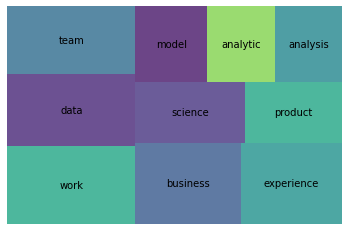

In [223]:
squarify.plot(sizes=dtm_counts, label=dtm_counts.index, alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [224]:
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1, 4),
                        max_df=.97,
                        min_df=.05,
                        tokenizer=tokenize)

dtm = tfidf.fit_transform(df['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm

,$,+,+ year,+ year experience,\xe2\x80\x93,ability,ability work,able,academic,accelerate,...,write verbal,write verbal communication,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\xe2\x80\x99ll
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.082991,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.042185,0.045750,0.000000,0.000000,0.038675,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.030272,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.243795,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.034871,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
4,0.000000,0.227492,0.246719,0.000000,0.331556,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.163249,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.052954,0.063330,0.068682,0.098686,0.000000,0.058060,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.090891,0.074816,0.0,0.0,0.0,0.0,0.06345,0.047935
422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
423,0.078354,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.033622,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.094799,0.0,0.135596,...,0.0,0.0,0.025805,0.042482,0.0,0.0,0.0,0.0,0.00000,0.000000


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [225]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
model.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [226]:
def recommendations(text):
    text_transformed = tfidf.transform(text)
    results = model.kneighbors(text_transformed.todense())

    return results


In [227]:
text = ["""
Looking for a data scientist with experience in predictive modeling techniques such as linear regression, logistic regression, decision trees, SVC and neural networks.
Experience with time series data is a plus.
Skills:
Python
SQL
Microsoft Access
VBA

Job location:
Fully remote
"""]

print(recommendations(text))


(array([[1.16087888, 1.17236512, 1.22079525, 1.22079525, 1.2253458 ,
        1.23968927]]), array([[ 79, 327, 413, 153,  51, 338]], dtype=int64))


In [230]:
pprint.pprint(df['cleaned_description'][79])


("b'ContractAkraya is looking for a Data Scientist for one of our clients. If "
 'the job description below is a fit, please apply directly or call Swapnil at '
 '408-907-3201. If this position is not quite what you\\xe2\\x80\\x99 re '
 'looking for, visit akraya.Com and submit a copy of your resume. Our '
 'recruiters will get to work finding you a job that is a better match at one '
 'of our many clients.\\n\\nPrimary Skills: Data Science, Hive/Impala/Hadoop, '
 'Statistical and Data Mining, R, Python, Redshift/ S3/ Spark, Google '
 'Analytics/ Adwords\\nDuration: 6+ Months, with possible extension\\nContract '
 'Type: W2 Only\\n\\nTop Daily Responsibilities:\\nKnowledge and experience '
 'with large data sets, event streams and distributed computing '
 '(Hive/Impala/Hadoop etc.)\\nAbility to gather requirements and develop '
 'reports in tool selected by business and KPIT\\nSupport Data-Science and '
 'other analytics as needed.\\nDevelop SQL queries and data sets\\nDevelop '
 'busi

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 